## Test Unet

In [1]:
import torch
from backbones.unet import Unet

In [2]:
batch_size = 1
features = 1
window_length = 48

hidden_features = 256
context_features = 256

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

backbone = Unet(features, hidden_features, context_features).to(device)

In [3]:
x = torch.rand(batch_size, features, window_length).to(device)
# (batch_size, t_feature, 1). t_feature is the time feature, 1 for broadcast to all values in the window
t = torch.rand(batch_size, 1, 1).to(device)

y = backbone(x, t)
y.shape == x.shape

True

## Test DDPM

In [4]:
import torch
from schedulers.ddpm import DDPMScheduler

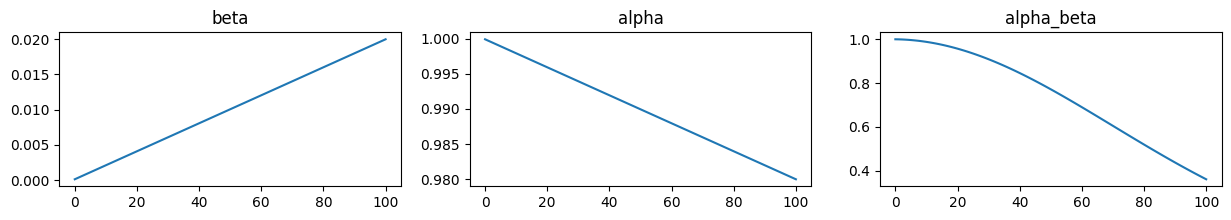

In [5]:
import matplotlib.pyplot as plt

beta1 = 1e-4
beta2 = 0.02
timesteps = 100
b_t = (beta2 - beta1) * torch.linspace(0, 1, timesteps + 1) + beta1
a_t = 1 - b_t
ab_t = torch.cumsum(a_t.log(), dim=0).exp()

fig, ax = plt.subplots(1, 3, figsize=(15, 2))
ax[0].plot(b_t)
ax[0].set_title('beta')
ax[1].plot(a_t)
ax[1].set_title('alpha')
ax[2].plot(ab_t)
ax[2].set_title('alpha_beta')
plt.show()
plt.close(fig)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
schedulers = DDPMScheduler(device=device)

In [7]:
sample_mask = torch.zeros(1, 1, 48).to(device)
sample_mask[:, :, 12:36] = 1

output = schedulers(backbone, sample_mask)
output.shape == sample_mask.shape

DDPMScheduler: 100%|██████████| 100/100 [00:00<00:00, 142.28it/s]


True

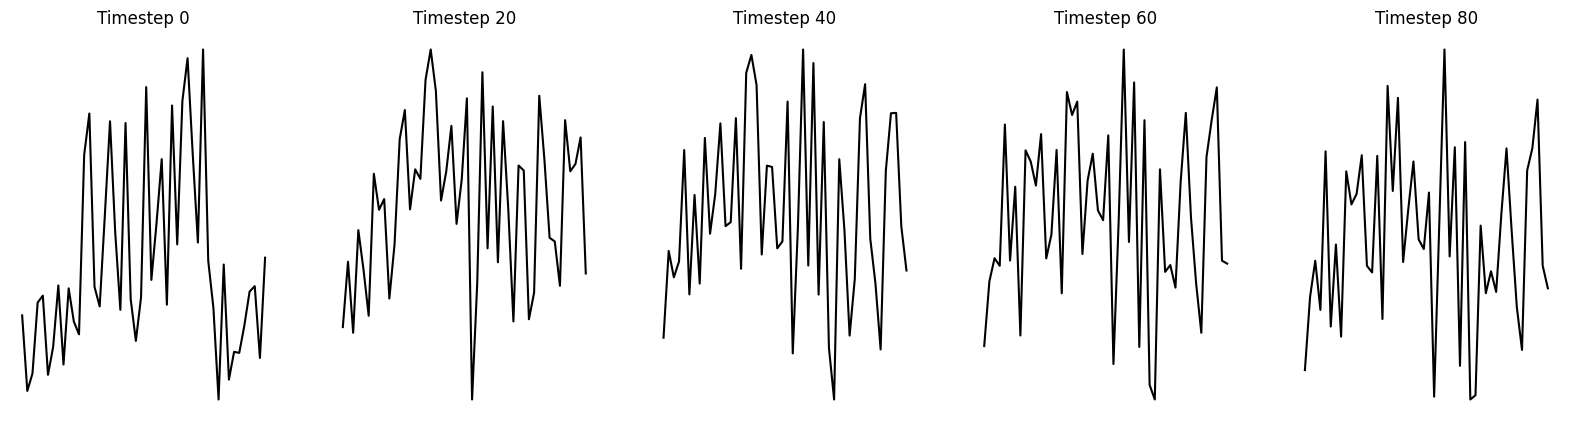

In [8]:
schedulers.visualize_trace_samples()